Goal of this notebook is to apply Principal Component Analysis in order to select important features from our nba dataset

Potential Reading Material
- [pca clearly explained and when to use it](https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e/?source=friends_link&sk=65bf5440e444c24aff192fedf9f8b64f)
- [step by step manually implementing and explaining](https://sebastianraschka.com/Articles/2014_pca_step_by_step.html)


- [also manually implementing from scratch](https://glowingpython.blogspot.com/2011/07/principal-component-analysis-with-numpy.html)
- [also also manually implementing from scratch](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)

# 1. Importing Packages and Data

In [19]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

# if manually computing
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

# if using sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
# Set display options to show all columns and a large width
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Adjust the width as needed

In [36]:
file_id = '1U2UaHWRSkUXfJBn4kBHPYttd3dvw_CZF'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url, encoding='utf-8')


df.tail()

,game_id,season,team_id,team_name,tri_code,team_slug,minutes,field_goals_made,field_goals_attempted,field_goals_percentage,three_pointers_made,three_pointers_attempted,three_pointers_percentage,free_throws_made,free_throws_attempted,free_throws_percentage,rebounds_offensive,rebounds_defensive,rebounds_total,steals,blocks,turnovers,fouls_personal,points,plus_minus_points,estimated_offensive_rating,offensive_rating,estimated_defensive_rating,defensive_rating,estimated_net_rating,net_rating,assist_percentage,assist_to_turnover,assist_ratio,offensive_rebound_percentage,defensive_rebound_percentage,rebound_percentage,estimated_team_turnover_percentage,turnover_ratio,effective_field_goal_percentage,true_shooting_percentage,usage_percentage,estimated_usage_percentage,estimated_pace,pace,pace_per40,possessions,p_i_e,distance,rebound_chances_offensive,rebound_chances_defensive,rebound_chances_total,touches,secondary_assists,free_throw_assists,passes,assists,contested_field_goals_made,contested_field_goals_attempted,contested_field_goal_percentage,uncontested_field_goals_made,uncontested_field_goals_attempted,uncontested_field_goals_percentage,field_goal_percentage,defended_at_rim_field_goals_made,defended_at_rim_field_goals_attempted,defended_at_rim_field_goal_percentage,opponent_points,is_home_team,won_game,is_playoff_game,is_regular_game
55309,12300007,2023-24,1610612754,Pacers,IND,pacers,265:00,45.0,112.0,0.402,13.0,53.0,0.245,19.0,24.0,0.792,16.0,40.0,56.0,10.0,11.0,17.0,19.0,122.0,-5.0,97.9,104.3,102.2,107.6,-4.3,-3.4,0.667,1.67,17.6,0.377,0.733,0.543,14.451,15.4,0.460,0.498,1.0,0.199,112.66,106.42,88.68,117.0,0.485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402,0.0,0.0,0.0,127.0,0,0,0,0
55310,12300005,2023-24,1610612756,Suns,PHX,suns,265:00,42.0,95.0,0.442,14.0,37.0,0.378,32.0,38.0,0.842,11.0,39.0,50.0,8.0,4.0,19.0,26.0,130.0,4.0,108.6,109.2,108.7,106.8,-0.1,2.5,0.643,1.42,17.1,0.241,0.800,0.513,15.870,16.0,0.516,0.582,1.0,0.199,106.72,107.32,89.43,119.0,0.504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.442,0.0,0.0,0.0,126.0,0,1,0,0
55311,12300002,2023-24,1610612750,Timberwolves,MIN,timberwolves,240:00,39.0,90.0,0.433,14.0,31.0,0.452,12.0,16.0,0.750,13.0,33.0,46.0,9.0,8.0,18.0,23.0,104.0,8.0,100.0,101.0,87.7,93.2,12.3,7.8,0.641,1.25,17.6,0.315,0.629,0.483,19.223,19.4,0.511,0.536,1.0,0.197,106.76,103.00,85.83,103.0,0.553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433,0.0,0.0,0.0,96.0,0,1,0,0
55312,12300003,2023-24,1610612747,Lakers,LAL,lakers,207:10,34.0,85.0,0.400,12.0,32.0,0.375,9.0,17.0,0.529,9.0,29.0,38.0,8.0,5.0,14.0,15.0,89.0,-13.0,93.6,95.0,107.7,106.9,-14.1,-11.9,0.556,1.43,13.7,0.203,0.739,0.438,13.796,14.0,0.478,0.481,1.0,0.188,116.85,116.43,97.02,100.0,0.391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410,0.0,0.0,0.0,103.0,0,0,0,0
55313,12300001,2023-24,1610612742,Mavericks,DAL,mavericks,240:00,34.0,92.0,0.370,14.0,46.0,0.304,17.0,30.0,0.567,7.0,35.0,42.0,11.0,8.0,13.0,25.0,99.0,-12.0,89.0,96.1,100.3,107.8,-11.3,-11.7,0.529,1.38,13.2,0.266,0.649,0.446,11.691,12.6,0.446,0.471,1.0,0.198,110.94,103.00,85.83,103.0,0.366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370,0.0,0.0,0.0,111.0,0,0,0,0


In [38]:
df_regular_games = df.loc[df['is_regular_game'] == 1]
df_playoff_games = df.loc[df['is_playoff_game'] == 1]
df = pd.concat([df_playoff_games, df_playoff_games], ignore_index=True)

In [41]:
df.tail()

,game_id,season,team_id,team_name,tri_code,team_slug,minutes,field_goals_made,field_goals_attempted,field_goals_percentage,three_pointers_made,three_pointers_attempted,three_pointers_percentage,free_throws_made,free_throws_attempted,free_throws_percentage,rebounds_offensive,rebounds_defensive,rebounds_total,steals,blocks,turnovers,fouls_personal,points,plus_minus_points,estimated_offensive_rating,offensive_rating,estimated_defensive_rating,defensive_rating,estimated_net_rating,net_rating,assist_percentage,assist_to_turnover,assist_ratio,offensive_rebound_percentage,defensive_rebound_percentage,rebound_percentage,estimated_team_turnover_percentage,turnover_ratio,effective_field_goal_percentage,true_shooting_percentage,usage_percentage,estimated_usage_percentage,estimated_pace,pace,pace_per40,possessions,p_i_e,distance,rebound_chances_offensive,rebound_chances_defensive,rebound_chances_total,touches,secondary_assists,free_throw_assists,passes,assists,contested_field_goals_made,contested_field_goals_attempted,contested_field_goal_percentage,uncontested_field_goals_made,uncontested_field_goals_attempted,uncontested_field_goals_percentage,field_goal_percentage,defended_at_rim_field_goals_made,defended_at_rim_field_goals_attempted,defended_at_rim_field_goal_percentage,opponent_points,is_home_team,won_game,is_playoff_game,is_regular_game
6695,42300101,2023-24,1610612748,Heat,MIA,heat,240:00,38.0,81.0,0.469,12.0,37.0,0.324,6.0,6.0,1.000,5.0,29.0,34.0,4.0,1.0,9.0,13.0,94.0,-20.0,104.9,105.6,126.6,126.7,-21.7,-21.0,0.605,2.09,19.6,0.163,0.682,0.425,12.271,12.4,0.543,0.562,1.0,0.197,89.84,89.5,74.58,89.0,0.411,18.15,17.0,52.0,68.0,385.0,4.0,1.0,285.0,23.0,11.0,20.0,0.550,27.0,61.0,0.443,0.469,5.0,12.0,0.417,114.0,0,0,1,0
6696,42300151,2023-24,1610612747,Lakers,LAL,lakers,240:00,39.0,79.0,0.494,8.0,29.0,0.276,17.0,19.0,0.895,6.0,34.0,40.0,3.0,7.0,12.0,15.0,103.0,-11.0,110.3,109.6,119.2,121.3,-8.9,-11.7,0.564,1.83,18.1,0.171,0.661,0.454,12.853,12.8,0.544,0.590,1.0,0.199,94.50,94.0,78.33,94.0,0.476,16.19,12.0,53.0,64.0,373.0,3.0,3.0,263.0,22.0,15.0,34.0,0.441,24.0,45.0,0.533,0.494,22.0,32.0,0.688,114.0,0,0,1,0
6697,42300111,2023-24,1610612755,76ers,PHI,sixers,240:00,36.0,81.0,0.444,12.0,35.0,0.343,20.0,22.0,0.909,9.0,24.0,33.0,8.0,7.0,11.0,21.0,104.0,-7.0,112.2,116.9,120.2,124.7,-8.0,-7.9,0.472,1.55,14.3,0.298,0.482,0.398,11.869,12.4,0.519,0.573,1.0,0.199,92.50,89.0,74.17,89.0,0.466,17.04,25.0,64.0,88.0,362.0,4.0,3.0,252.0,17.0,14.0,27.0,0.519,22.0,54.0,0.407,0.444,14.0,20.0,0.700,111.0,0,0,1,0
6698,42300131,2023-24,1610612753,Magic,ORL,magic,240:00,28.0,86.0,0.326,8.0,37.0,0.216,19.0,30.0,0.633,11.0,29.0,40.0,12.0,7.0,12.0,25.0,83.0,-14.0,82.8,86.5,98.7,101.0,-15.9,-14.6,0.571,1.33,12.6,0.250,0.717,0.445,11.976,12.5,0.372,0.418,1.0,0.198,99.22,96.0,80.00,96.0,0.323,17.82,29.0,60.0,87.0,375.0,1.0,2.0,259.0,16.0,16.0,32.0,0.500,12.0,54.0,0.222,0.326,15.0,25.0,0.600,97.0,0,0,1,0
6699,42300161,2023-24,1610612756,Suns,PHX,suns,240:00,33.0,75.0,0.440,9.0,28.0,0.321,20.0,25.0,0.800,3.0,25.0,28.0,9.0,6.0,15.0,19.0,95.0,-25.0,96.9,99.0,120.4,123.7,-23.4,-24.8,0.485,1.07,13.7,0.130,0.600,0.363,15.306,15.6,0.500,0.552,1.0,0.200,98.84,96.5,80.42,96.0,0.372,17.48,15.0,46.0,60.0,380.0,2.0,1.0,266.0,16.0,13.0,25.0,0.520,20.0,50.0,0.400,0.440,16.0,21.0,0.762,120.0,0,0,1,0


In [62]:
df_test = df.loc[df['season'] == '2013-14']

df_test[['distance', 'rebound_chances_offensive', 'rebound_chances_defensive', 'rebound_chances_total', 'touches', 'secondary_assists', 'free_throw_assists', 'passes' ,'assists']].describe().T

,count,mean,std,min,25%,50%,75%,max
distance,356.0,16.648989,0.721851,15.36,16.1,16.525,17.11,18.71
rebound_chances_offensive,356.0,32.219101,9.870273,13.00,24.0,32.000,38.00,66.00
rebound_chances_defensive,356.0,60.000000,11.762437,34.00,52.0,59.500,67.00,92.00
rebound_chances_total,356.0,89.269663,17.092797,48.00,77.0,89.000,102.00,133.00
touches,356.0,396.398876,32.979437,320.00,375.0,394.500,418.00,515.00
secondary_assists,356.0,2.724719,1.784931,0.00,1.0,2.000,4.00,9.00
free_throw_assists,356.0,1.314607,1.158878,0.00,0.0,1.000,2.00,5.00
passes,356.0,281.320225,31.898320,205.00,260.0,281.000,301.00,392.00
assists,356.0,19.808989,4.264168,9.00,17.0,20.000,23.00,32.00


** From season = '2013-14` onward, do passes, rebound, chances, touches, etc seem to have valid values

In [63]:
list(df['season'].unique())

['2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20',
 '2020-21',
 '2021-22',
 '2022-23',
 '2023-24']

In [5]:
print(df.columns.to_list())

['game_id', 'season', 'team_id', 'team_name', 'tri_code', 'team_slug', 'minutes', 'field_goals_made', 'field_goals_attempted', 'field_goals_percentage', 'three_pointers_made', 'three_pointers_attempted', 'three_pointers_percentage', 'free_throws_made', 'free_throws_attempted', 'free_throws_percentage', 'rebounds_offensive', 'rebounds_defensive', 'rebounds_total', 'steals', 'blocks', 'turnovers', 'fouls_personal', 'points', 'plus_minus_points', 'estimated_offensive_rating', 'offensive_rating', 'estimated_defensive_rating', 'defensive_rating', 'estimated_net_rating', 'net_rating', 'assist_percentage', 'assist_to_turnover', 'assist_ratio', 'offensive_rebound_percentage', 'defensive_rebound_percentage', 'rebound_percentage', 'estimated_team_turnover_percentage', 'turnover_ratio', 'effective_field_goal_percentage', 'true_shooting_percentage', 'usage_percentage', 'estimated_usage_percentage', 'estimated_pace', 'pace', 'pace_per40', 'possessions', 'p_i_e', 'distance', 'rebound_chances_offensi

In [40]:
df[['distance', 'rebound_chances_offensive', 'rebound_chances_defensive', 'rebound_chances_total', 'touches', 'secondary_assists', 'free_throw_assists', 'passes']].var()


distance                        73.054576
rebound_chances_offensive      233.311154
rebound_chances_defensive      863.226343
rebound_chances_total         1784.398331
touches                      38576.948259
secondary_assists                4.074740
free_throw_assists               1.787555
passes                       19005.412727
dtype: float64

# 2. Preprocess Data
Before running PCA we need to:
1. drop non numeric columns (`game_id`, `season`, `team_id`, `team_name`, `tri_code`, `team_slug`, `minutes`)  
    - and decide which dummy categorical columns (`is_home_team`, `won_game`, `is_playoff_game`, `is_regular_game`) to drop
    - coming back from later on: how about dropping the calculatable percentage ones like (`field_goals_percentage`, `three_pointers_percentage`, `free_throws_percentage`, `rebounds_total`, `assist_percentage`, `offensive_rebound_percentage`, `defensive_rebound_percentage`, `rebound_percentage`, `estimated_team_turnover_percentage`)
    + `usage_percentage` since it has 0 variance
2. handle missing values
3. standardize the numeric features (since pca works best with standardized data)

Going to check the variance of each dummy variable since if the variance is close to 0 it wont really contribute much to PCA and can be dropped

In [8]:
df[['is_home_team', 'won_game', 'is_playoff_game', 'is_regular_game']].var()

is_home_team       0.250005
won_game           0.250004
is_playoff_game    0.056896
is_regular_game    0.113813
dtype: float64

Since .25 is the maximum variance possible for binary dummy variable we'll keep `is_home_team` and `won_game` and drop `is_playoff_game` and `is_regular_game`

In [16]:
cols_to_drop = [
    'game_id',
    'season',
    'team_id',
    'team_name',
    'tri_code',
    'team_slug',
    'minutes',

    #'is_home_team',
    #'won_game',
    'is_playoff_game',
    'is_regular_game'
]

df_num = df.drop(columns=cols_to_drop)

Now deal with missing values. A prior notebook did the logic for why dropping instead of imputing is fine.

In [17]:
shape_before = df_num.shape
df_num = df_num.dropna()

print(f'Shape before dropping nas: {shape_before}\n Shape after dropping nas: {df_num.shape}')

Shape before dropping nas: (55314, 63)
 Shape after dropping nas: (53262, 63)


On to using `StandardScaler` from scikit learn to standarize the numeric features ([docs link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler))


In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# convert back to dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df_num.columns)

df_scaled.head()

,field_goals_made,field_goals_attempted,field_goals_percentage,three_pointers_made,three_pointers_attempted,three_pointers_percentage,free_throws_made,free_throws_attempted,free_throws_percentage,rebounds_offensive,...,uncontested_field_goals_made,uncontested_field_goals_attempted,uncontested_field_goals_percentage,field_goal_percentage,defended_at_rim_field_goals_made,defended_at_rim_field_goals_attempted,defended_at_rim_field_goal_percentage,opponent_points,is_home_team,won_game
0,-1.684580,-1.942683,-0.573941,-0.418588,-1.407137,2.639301,-0.331642,-0.614358,0.771556,-0.691278,...,-1.008432,-1.034086,-1.031746,-0.576319,-0.978663,-0.995885,-1.030684,-2.143305,1.0,1.000075
1,-1.327243,-1.091283,-0.804261,-0.186500,0.347548,-0.644321,-0.331642,0.302623,-1.439958,0.593229,...,-1.008432,-1.034086,-1.031746,-0.807250,-0.978663,-0.995885,-1.030684,-0.628725,1.0,-0.999925
2,-0.255232,0.003375,-0.325905,-1.579027,-1.613571,-1.244755,0.152084,-0.090369,0.615678,1.363934,...,-1.008432,-1.034086,-1.031746,-0.327625,-0.978663,-0.995885,-1.030684,-0.556602,1.0,-0.999925
3,0.459442,0.733147,-0.042434,-1.579027,-1.613571,-1.244755,-0.009158,-0.090369,0.196757,0.593229,...,-1.008432,-1.034086,-1.031746,-0.043404,-0.978663,-0.995885,-1.030684,-2.359674,1.0,1.000075
4,0.280773,0.125004,0.223320,-1.346940,-1.097487,-1.319809,-0.815368,-0.876353,0.021395,1.620835,...,-1.008432,-1.034086,-1.031746,0.223054,-0.978663,-0.995885,-1.030684,-1.782691,1.0,1.000075


# 3. Running PCA

Questions I've already got

- do I necessarily need to choose how many components reduction to?
- for PCA() why fit instead of fit_transform

## 3.1 (Univ Primer Method)

Not to be trusted whatsoever but tis a simpler starting point

In [20]:
# Perfom PCA

pca = PCA()
pca.fit(df_scaled)

PCA()

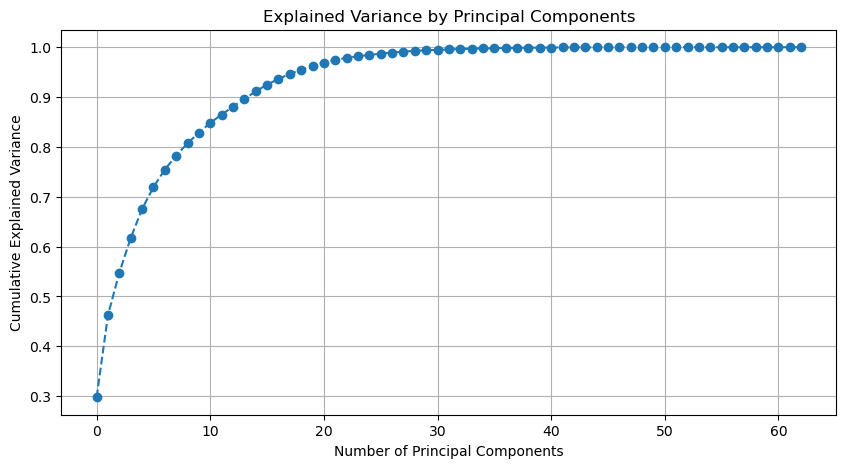

19

In [22]:
explained_variance = pca.explained_variance_ratio_

# plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# find number of components to explain 95% variance
num_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1

# number of components needed to retain 95% variance
num_components

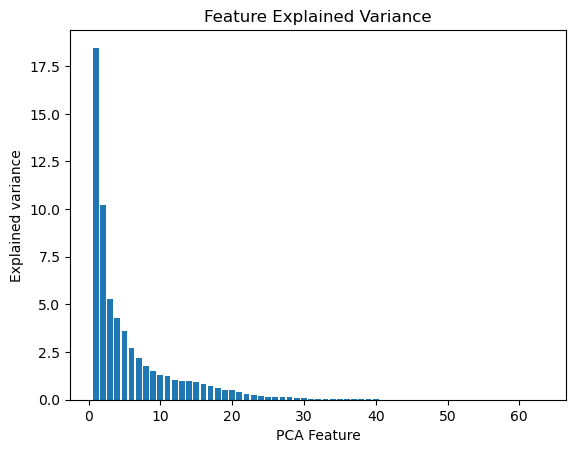

In [67]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [65]:
print(abs(pca.components_)[0])

[0.13360245 0.10786632 0.07258237 0.15123201 0.15637999 0.04512637
 0.01544633 0.02618076 0.02488332 0.02570461 0.07591475 0.04856952
 0.01433307 0.00802411 0.02381936 0.02810394 0.14794949 0.04941828
 0.10429272 0.10653453 0.0422248  0.04608491 0.04880439 0.04915061
 0.04465857 0.08004451 0.08995136 0.00570452 0.05334271 0.05723314
 0.05555085 0.05522186 0.10915781 0.09957055 0.         0.00717119
 0.12222935 0.10043606 0.10043483 0.11656367 0.04768366 0.21599557
 0.189019   0.20914908 0.20693984 0.21412522 0.17587808 0.1495657
 0.21266317 0.11476069 0.20936872 0.20545305 0.21496051 0.21917191
 0.21620096 0.21691967 0.07224575 0.20622768 0.20897568 0.20917243
 0.09788992 0.01030932 0.03979827]


https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

In [24]:
num_components = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(num_components)]

inital_feature_names = df_num.columns.to_list()
most_important_names = [inital_feature_names[most_important[i]] for i in range(num_components)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(num_components)}
pca_df = pd.DataFrame(dic.items())


In [25]:
print(pca_df)

       0                             1
0    PC0  uncontested_field_goals_made
1    PC1          estimated_net_rating
2    PC2    estimated_defensive_rating
3    PC3                     turnovers
4    PC4         field_goals_attempted
..   ...                           ...
58  PC58                    net_rating
59  PC59                          pace
60  PC60                        points
61  PC61              usage_percentage
62  PC62                rebounds_total

[63 rows x 2 columns]


In [70]:
# Here we are figuring out if we reduced to 10 features, which ones are the most important?

model = PCA(n_components=10).fit(df_scaled)
pc = model.transform(df_scaled)

# number of components
n_pcs = model.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(df_num.columns)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [71]:
df

,0,1
0,PC0,uncontested_field_goals_made
1,PC1,estimated_net_rating
2,PC2,estimated_defensive_rating
3,PC3,turnovers
4,PC4,field_goals_attempted
5,PC5,free_throws_made
6,PC6,offensive_rebound_percentage
7,PC7,assist_percentage
8,PC8,defensive_rebound_percentage
9,PC9,steals


So those represent the 10 most important features. Definitely would want to know how much vaariance in the dataset those 10 features 

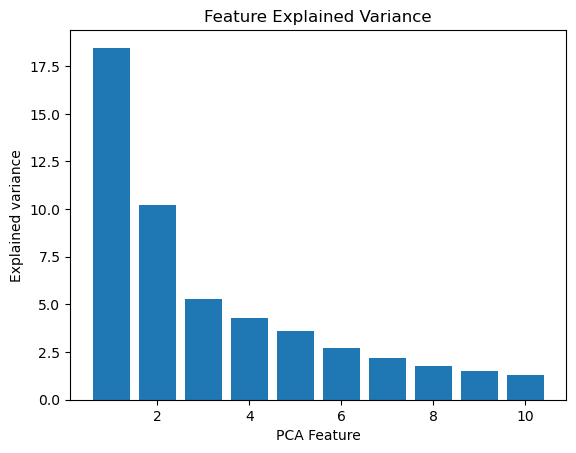

In [72]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(model.explained_variance_)+1),
    model.explained_variance_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

actually I wanted cumulative version

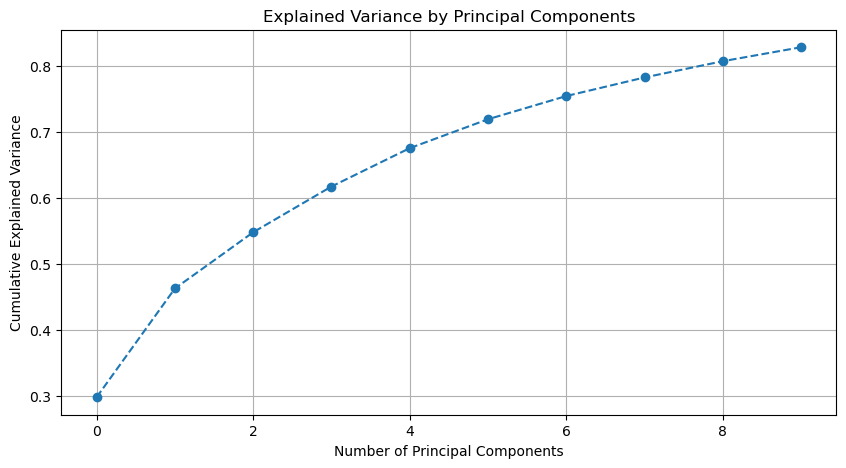

1

In [73]:
explained_variance = model.explained_variance_ratio_

# plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# find number of components to explain 95% variance
num_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1

# number of components needed to retain 95% variance
num_components

Looked over the sklearn docs page once more and thought to try using svd with variance based n_components
https://scikit-learn.org/1.6/modules/generated/sklearn.decomposition.PCA.html 

In [74]:
# Perfom PCA

model2 = PCA(n_components=.9, svd_solver='full').fit(df_scaled)
pc2 = model2.transform(df_scaled)

In [75]:
# number of components
n_pcs = model2.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(model2.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(df_num.columns)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
print(df)

       0                             1
0    PC0  uncontested_field_goals_made
1    PC1          estimated_net_rating
2    PC2    estimated_defensive_rating
3    PC3                     turnovers
4    PC4         field_goals_attempted
5    PC5              free_throws_made
6    PC6  offensive_rebound_percentage
7    PC7             assist_percentage
8    PC8  defensive_rebound_percentage
9    PC9                        steals
10  PC10           three_pointers_made
11  PC11        free_throws_percentage
12  PC12    estimated_usage_percentage
13  PC13    estimated_usage_percentage
14  PC14                        blocks


In [84]:
[i for i in list(df_num.columns) if i.startswith('estimated_usage')]

['estimated_usage_percentage']

In [85]:
model2.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14'],
      dtype=object)

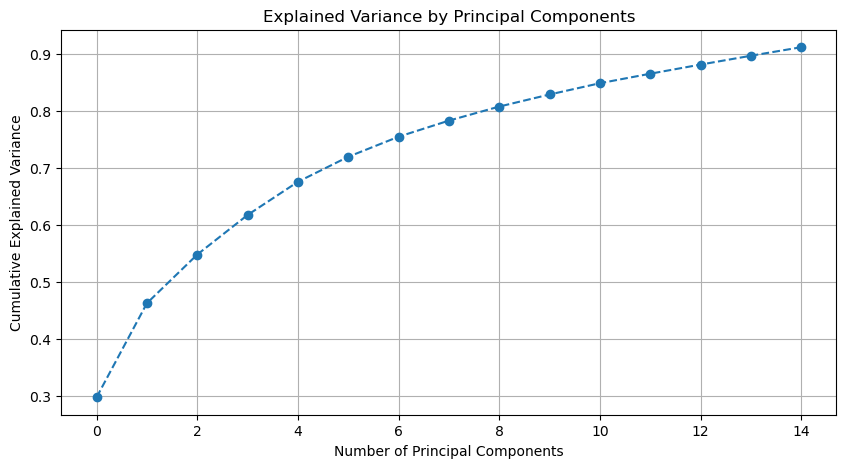

1

In [77]:
explained_variance = model2.explained_variance_ratio_

# plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# find number of components to explain 95% variance
num_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1

# number of components needed to retain 95% variance
num_components

scroll down more on https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

In [30]:
from pca import pca as PCA2 # aliasing since already have the scikit learn pca

In [31]:
pca2 = PCA2()

result = pca2.fit_transform(df_scaled)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [63] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [19] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [63] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[19]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 19 Principal Components explain [96.29%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

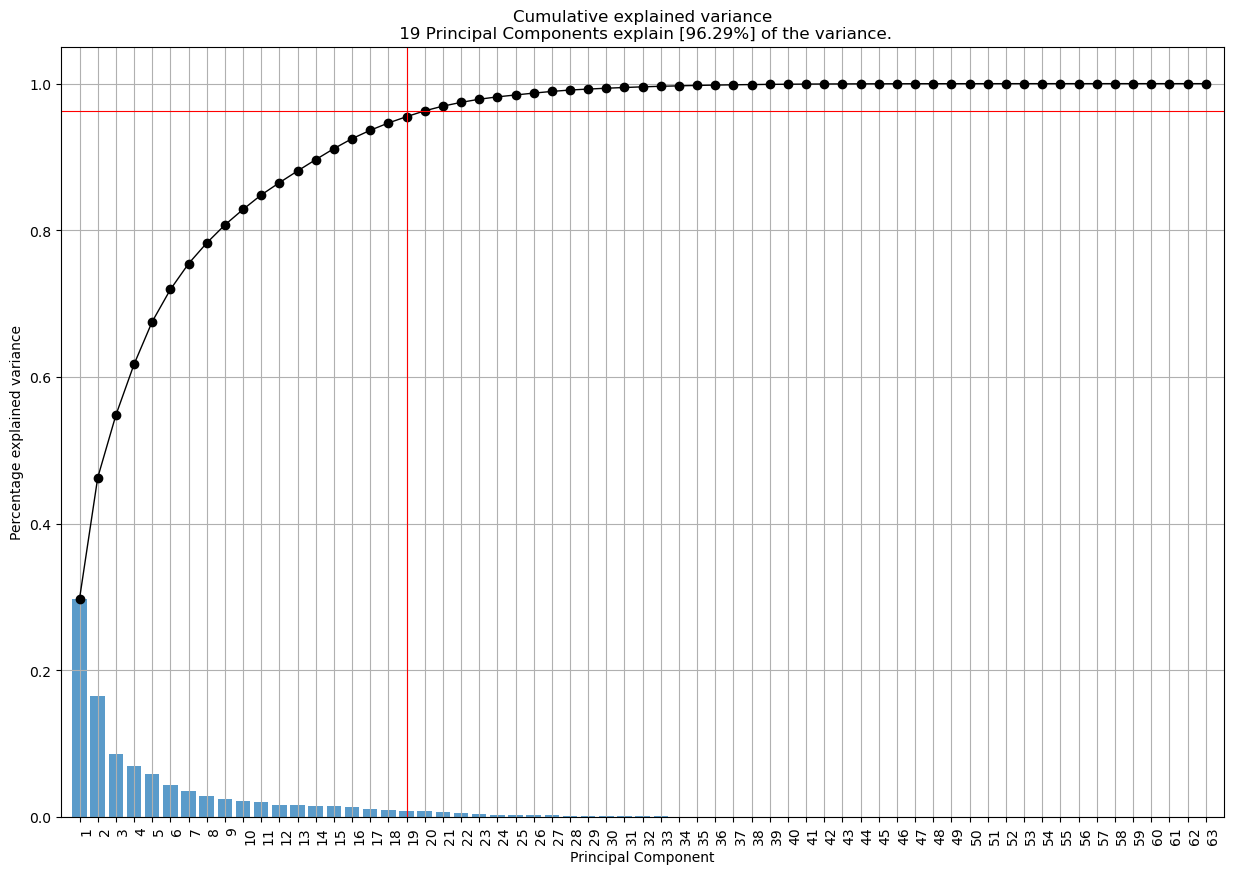

In [32]:
pca2.plot()

In [89]:
# initialize to reduce data up to num components that explains 95% of variance
model3 = PCA2(n_components=0.9)
results3 = model3.fit_transform(df_scaled)


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [63] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [15] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [63] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[15]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 15 Principal Components explain [92.49%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

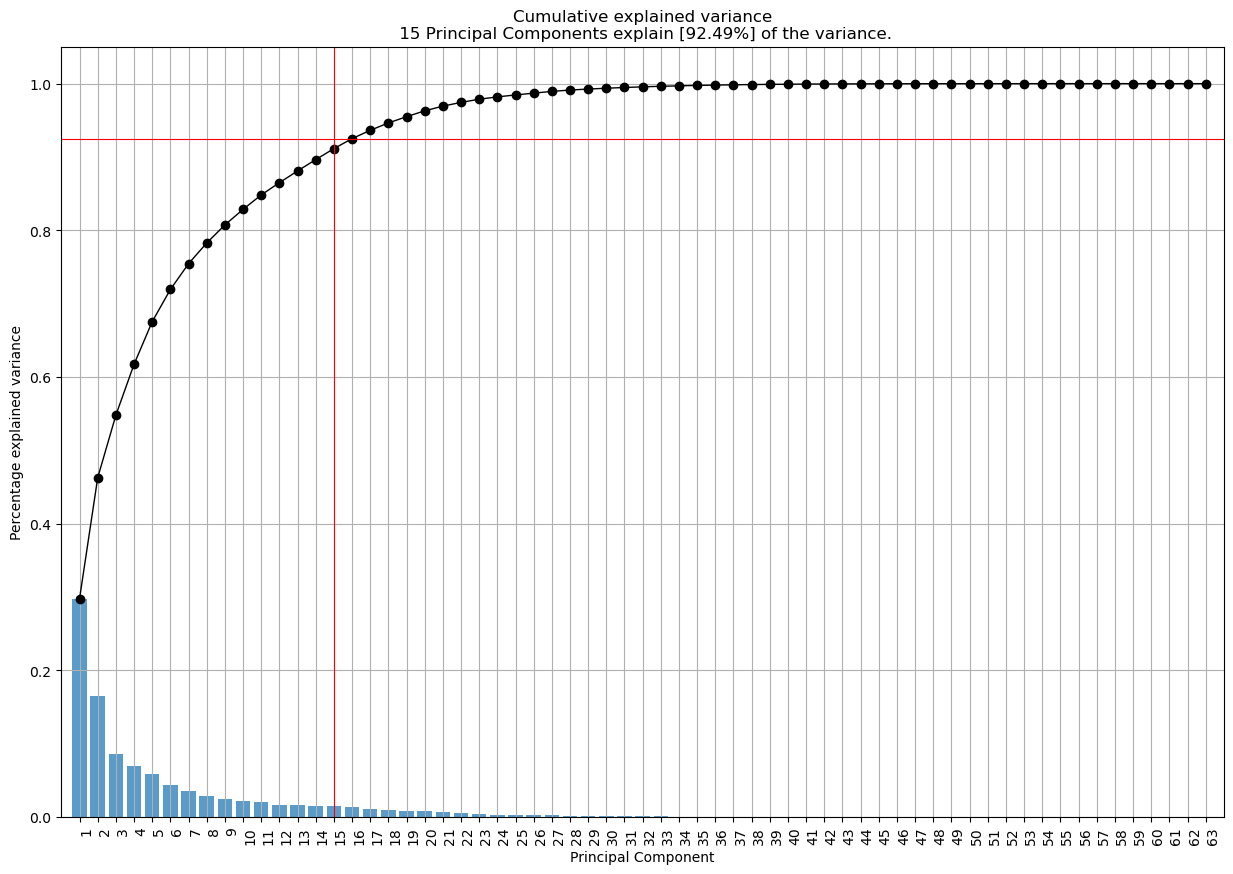

In [90]:
model3.plot()

In [95]:
results3['topfeat'].head(30)

,PC,feature,loading,type
0,PC1,uncontested_field_goals_made,0.219172,best
1,PC2,estimated_net_rating,0.261236,best
2,PC3,estimated_defensive_rating,0.385603,best
3,PC4,turnovers,0.346744,best
4,PC5,field_goals_attempted,0.371996,best
5,PC6,free_throws_made,0.475753,best
6,PC7,offensive_rebound_percentage,0.492975,best
7,PC8,assist_percentage,0.510459,best
8,PC9,defensive_rebound_percentage,0.557364,best
9,PC10,steals,0.577476,best


Best features I see








When I excluded the dummy vars:
points
opponent_points
possessions
estimated_team_turnover_percentage
constested_field_goals_made
passes
offensive_rebound_percentage
free_throws_made
defensive_rebound_percentage
steals
defeneded_at_rim_goals_made
contested_field_goals_percentages
passes
free_throw_assists
estimated_usage_percentage
fouls_personal
secondary_assists
free_throw_assists
blocks

From attempt 1

{'assist_percentage',
 'blocks',
 'distance',
 'estimated_offensive_rating',
 'estimated_team_turnover_percentage',
 'estimated_usage_percentage',
 'free_throws_made',
 'free_throws_percentage',
 'is_home_team',
 'offensive_rebound_percentage',
 'opponent_points',
 'possessions',
 'rebound_percentage',
 'steals'}

From attempt 2 (added experiemental code to exclude rows where 0 in a couple specific columns doesnt make sense)

{'assist_percentage',
 'contested_field_goals_made',
 'defended_at_rim_field_goals_attempted',
 'defensive_rebound_percentage',
 'effective_field_goal_percentage',
 'estimated_team_turnover_percentage',
 'estimated_usage_percentage',
 'free_throws_made',
 'free_throws_percentage',
 'is_home_team',
 'offensive_rebound_percentage',
 'opponent_points',
 'possessions',
 'rebound_percentage',
 'steals'}